In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from sklearn.metrics.pairwise import cosine_similarity
from keras.preprocessing import image
from keras.applications import  vgg16,vgg19,xception,mobilenet, resnet
from keras.models import Model
from keras.applications.imagenet_utils import preprocess_input
import os

In [2]:
PATH = r"C://Users//serde//images//"
similarity_matrix_path=r'C:\Users\serde\OneDrive\Masaüstü\bitirme\benzerlik_matrisi.csv'

In [3]:
train_df= pd.read_json(r"C:\Users\serde\OneDrive\Masaüstü\bitirme\train_data_310522.json")
train_df

,name,views,items,likes,set_id,desc
0,Casual,8743,"[{'index': 1, 'name': 'mock neck embroidery su...",394,214181831,A fashion look from January 2017 by beebeely-l...
1,Being a Vans shoe model with Luke. Idk about t...,188,"[{'index': 1, 'name': 'nirvana distressed t-sh...",9,120161271,A fashion look from April 2014 featuring destr...
2,These Chanel bags is a bad habit .x,562,"[{'index': 2, 'name': 'joy denim jacket', 'pri...",32,143656996,12.19.14
3,Avenger/Supernatural prp,2613,"[{'index': 1, 'name': 'tops', 'price': 18.0, '...",88,186627934,A fashion look from January 2016 by alyssaclai...
4,Boho (39),62,"[{'index': 1, 'name': 'yoins leather sexy v-ne...",3,206969379,A fashion look from August 2016 by kate-goida ...
...,...,...,...,...,...,...
16754,2.15.17,183,"[{'index': 2, 'name': 'bridge patchwork leathe...",117,216801059,A fashion look from February 2017 by kianahall...
16755,tweed,2428,"[{'index': 1, 'name': 'michael kors printed bo...",382,190488700,A fashion look from February 2016 by drigomes ...
16756,TV Style: Pretty Little Liars,2184,"[{'index': 1, 'name': 'color block fit flare m...",398,187504514,A fashion look from January 2016 by vanjazivad...
16757,60-Second Style: Work Wear,3147,"[{'index': 1, 'name': 'patchwork fit flare dre...",440,211085207,A fashion look from November 2016 by beebeely-...


In [4]:
IMG_SIZE=64
image_paths=[]
to_detect_dup=[]
m=0
while m<len(train_df):
    n=0
    l=len(train_df['items'][m])
    while n<l:
        if train_df['items'][m][n]["image"] not in to_detect_dup: 
            image_id= train_df['items'][m][n]["image"].split('.')[0]
            to_detect_dup.append(train_df['items'][m][n]["image"])
            filename = PATH + train_df['items'][m][n]["image"]
            isFile = os.path.isfile(filename)
            if isFile==True:
                image_paths.append(PATH+train_df['items'][m][n]["image"])
        n+=1
    m+=1

In [5]:
image_paths

['C://Users//serde//images//194508109.jpg',
 'C://Users//serde//images//188778349.jpg',
 'C://Users//serde//images//188977857.jpg',
 'C://Users//serde//images//194942557.jpg',
 'C://Users//serde//images//194941874.jpg',
 'C://Users//serde//images//103135174.jpg',
 'C://Users//serde//images//107307153.jpg',
 'C://Users//serde//images//124815566.jpg',
 'C://Users//serde//images//125624471.jpg',
 'C://Users//serde//images//178357420.jpg',
 'C://Users//serde//images//135914227.jpg',
 'C://Users//serde//images//180944840.jpg',
 'C://Users//serde//images//165020476.jpg',
 'C://Users//serde//images//141342171.jpg',
 'C://Users//serde//images//180707667.jpg',
 'C://Users//serde//images//177509842.jpg',
 'C://Users//serde//images//84582453.jpg',
 'C://Users//serde//images//170217678.jpg',
 'C://Users//serde//images//195617744.jpg',
 'C://Users//serde//images//194535792.jpg',
 'C://Users//serde//images//195696881.jpg',
 'C://Users//serde//images//151390452.jpg',
 'C://Users//serde//images//14922

In [6]:
model1=vgg16.VGG16(weights='imagenet')
model_instances=[model1]
model_names=['VGG16']

In [7]:
files=[]

In [8]:
def Get_similar_products(given_img):
    for i,m in enumerate(model_instances):
        print("original product:")
        imgs_model_height,imgs_model_width=m.input.shape[1:3]
        original = image.load_img(given_img, target_size=(imgs_model_width, imgs_model_height))
        #print(given_img) #dosyanın yolu bu
        files.append(given_img)
        plt.imshow(original)
        plt.show()
        print("5 most similar products:")
        df=pd.read_csv(similarity_matrix_path,index_col=0)
        df.head()
        closest_imgs = df[given_img].sort_values(ascending=False)[1:5+1].index
        closest_imgs_scores = df[given_img].sort_values(ascending=False)[1:5+1]
        for i in range(0,len(closest_imgs)):
            original = image.load_img(closest_imgs[i], target_size=(imgs_model_width, imgs_model_height))
            #print(closest_imgs[i])#dosyanın yolu bu
            files.append(closest_imgs[i])
            plt.imshow(original)
            plt.show()
            print("similarity score : ",closest_imgs_scores[i])

original product:


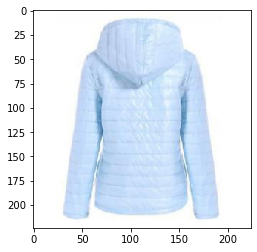

5 most similar products:


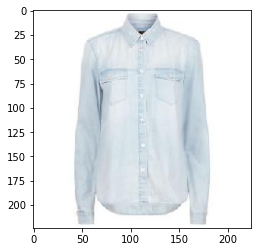

similarity score :  0.8609789


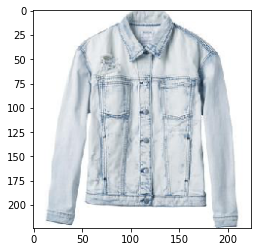

similarity score :  0.8534578


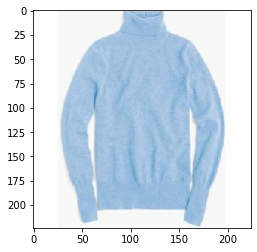

similarity score :  0.85185677


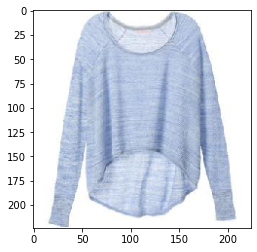

similarity score :  0.851849


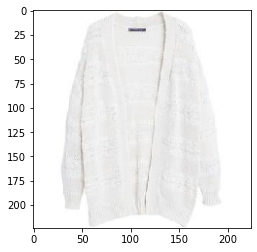

similarity score :  0.8508252


In [29]:
import tkinter as tk
from tkinter import *
from tkinter import filedialog
from tkinter.filedialog import askopenfile
from PIL import Image, ImageTk

my_w = tk.Tk()
my_w.geometry("700x700")  
my_w.title('RECOMMENDATION SYSTEM')
my_font1=('times', 18, 'bold')
l1 = tk.Label(my_w,text='Please click the button to get random recommendations',width=50,font=my_font1)  
l1.grid(row=1,column=1,columnspan=4)
b1 = tk.Button(my_w, text='Recommend me', 
   width=20,command = lambda:get_recommendation())
b1.grid(row=2,column=1,columnspan=4)
label = tk.Label(my_w, text='Original Product', compound='left',width=20,font=my_font1)
label.grid(row=3,column=1,columnspan=4)

def get_recommendation():
    i=np.random.randint(0,len(image_paths))
    Get_similar_products(image_paths[i])
    upload_file()

def upload_file():
    f_types = [('Jpg Files', '*.jpg'),
    ('PNG Files','*.png')]   # type of files to select 
    filename=files
    tuple(filename)
    col=2 # start from column 1
    row=4 # start from row 3 
    for f in filename:
        img=Image.open(f) # read the image file
        img=img.resize((150,150)) # new width & height
        img=ImageTk.PhotoImage(img)
        e1 =tk.Label(my_w)
        e1.grid(row=row,column=col)
        e1.image = img
        e1['image']=img
        if(row==4 and col==2):#orijinal resim için
            row=row+1
            col=0
        if(col==3): # start new line after third column
            row=row+1# start wtih next row
            col=1    # start with first column
        else:       # within the same row 
            col=col+1 # increase to next column 
    files.clear()
my_w.mainloop()  # Keep the window open

In [10]:
files

[]

In [27]:
files.clear()